In [1]:
%matplotlib notebook

import sys
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib import cm # Colormaps
from matplotlib.colors import colorConverter, ListedColormap
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=4)

In [23]:
nb_of_samples_per_class = 20  # The number of sample in each class
blue_mean = 0  # The mean of the blue class
red_left_mean = -2  # The mean of the red class
red_right_mean = 2  # The mean of the red class
std_dev = 0.5

xs_blue = np.random.randn(nb_of_samples_per_class, 1) * std_dev + blue_mean
xs_red = np.vstack((
    np.random.randn(  # Red star left samples
        nb_of_samples_per_class//2, 1) * std_dev + red_left_mean,
    np.random.randn(  # Red star right samples
        nb_of_samples_per_class//2, 1) * std_dev + red_right_mean
))
#vstack je funkcija koja samo nadovezuje, u ovom slučaju želim povezat
#plave i crvene x-eve s labelama, tj. klasama 0 ili 1
x = np.vstack((xs_blue, xs_red))
ones = np.ones((xs_blue.shape[0], 1))
zeros = np.zeros((xs_red.shape[0], 1))
t = np.vstack((ones, zeros))

<IPython.core.display.Javascript object>


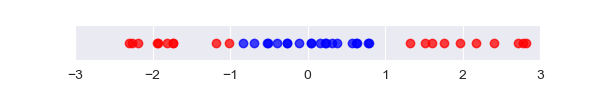

In [26]:
fig = plt.figure(figsize=(6,1))
plt.xlim(-3,3)
plt.ylim(-1,1)

plt.plot(xs_blue, np.zeros_like(xs_blue), 'bo', alpha=0.75)
plt.plot(xs_red, np.zeros_like(xs_red), 'ro', alpha=0.75)
plt.gca().axes.get_yaxis().set_visible(False)
fig.subplots_adjust(bottom=0.4, top=0.75)
plt.show()

In [50]:
def rbf(zh):
    return np.exp(-zh**2)

def rbf_derivative(zh):
    return -2*zh*rbf(zh)

def logistic(z):
    return 1. / (1. + np.exp(-z))

def hidden_activations(x, wh):
    return rbf(x * wh)

def output_activations(h, bo):
    return logistic(h+bo)

def nn(x, wh, bo):
    return output_activations(hidden_activations(x, wh), bo)

def nn_predict(x, wh, bo):
    return np.around(nn(x, wh, ))

In [51]:
def loss(y, t):
    first_member = t * np.log(y)
    second_member = (1 - t) * np.log(1-y)
    return -np.mean(first_member + second_member)

def loss_for_param(x, wh, bo, t):
    return loss(nn(x, wh, bo), t)

<IPython.core.display.Javascript object>


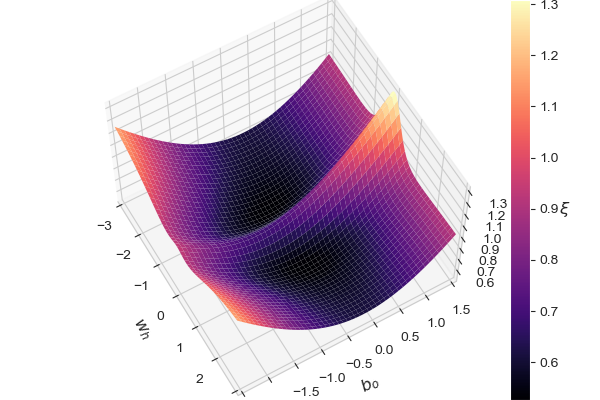

In [52]:
grid_size = 200 # Grid used to plot loss surface
wsh = np.linspace(-3, 3, num=grid_size) # hidden weights
bso = np.linspace(-2.5, 1.5, num=grid_size) # output weights
params_x, params_y = np.meshgrid(wsh, bso) # generate grid
# Initialise loss surface grid
loss_grid = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        loss_grid[i, j] = loss(nn(x, params_x[i, j], params_y[i, j]), t)
        
fig = plt.figure(figsize=(6, 4))
with sns.axes_style("whitegrid"):
    ax = Axes3D(fig)
# plot the surface
surf = ax.plot_surface(
    params_x, params_y, loss_grid, linewidth=0, cmap=cm.magma)
ax.view_init(elev=60, azim=-30)
cbar = fig.colorbar(surf)
ax.set_xlabel('$w_h$', fontsize=12)
ax.set_ylabel('$b_o$', fontsize=12)
ax.set_zlabel('$\\xi$', fontsize=12)
ax.set_ylim(-2.5, 1.5)
ax.set_xlim(-3, 3)
cbar.ax.set_ylabel('$\\xi$', fontsize=12, rotation=0)
plt.title('Loss function surface')
plt.show()        